# 2. Implementing AdaBoost.

Consider the following dataset, plotting in the following figure. The first two coordinates represent the
value of two features, and the last coordinate is the binary label of the data.

$$X1 = (−1, 0, +1), X2 = (−0.5, 0.5, +1), X3 = (0, 1, −1), X4 = (0.5, 1, −1)$$
$$X5 = (1, 0, +1), X6 = (1, −1, +1), X7 = (0, −1, −1), X8 = (0, 0, −1).$$

In this problem, you will run through T = 3 iterations of AdaBoost with decision stumps (as explained
in the lecture) as weak learners.


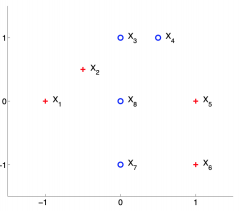

**(a) For each iteration t = 1, 2, 3, compute $\epsilon_t$, $α_t$, $Z_t$, $D_t$ by hand (i.e., show the calculation
steps) and draw the decision stumps on the figure.**

*Please note: All calculations are performed in the code. Since the homework requirements specify to not show code cells, only output, the grader will need to view the code to see the work. Or, view the copy/pasted code below:

points = [(-1,0), (-.5,.5), (0,1), (.5,1), (1,0), (1,-1), (0,-1), (0,0)]
labels = np.array( [1,1,-1,-1,1,1,-1,-1] )

stump1 = np.array( [-1 if x[0] < 1 else 1 for x in points] )

D1 = np.array( [1/8]*8 )

eps1 = D1 * (stump1!=labels)
eps1 = eps1.sum()

a1 = 1/2 * (np.log((1-eps1)/eps1))

D2top = D1 * np.exp(-a1*labels*stump1)
Z1 = D2top.sum()

D2 = D2top / Z1


stump2 = np.array( [1 if x[1] < 1 else -1 for x in points] )

eps2 = D2 * (stump2!=labels)
eps2 = eps2.sum()

a2 = 1/2 * (np.log((1-eps2)/eps2))

D3top = D2 * np.exp(-a2*labels*stump2)
Z2 = D3top.sum()

D3 = D3top / Z2

stump3 = np.array( [1 if x[0] < 1 else -1 for x in points] )

eps3 = D3 * (stump3!=labels)
eps3 = eps3.sum()

a3 = 1/3 * (np.log((1-eps3)/eps3))

D4top = D3 * np.exp(-a3*labels*stump3)
Z3 = D4top.sum()

D4 = D4top / Z3


In [99]:
points = [(-1,0), (-.5,.5), (0,1), (.5,1), (1,0), (1,-1), (0,-1), (0,0)]
labels = np.array( [1,1,-1,-1,1,1,-1,-1] )


In [100]:
stump1 = np.array( [-1 if x[0] < 1 else 1 for x in points] )


Calculating $D_t = 1/m$

In [24]:
D1 = np.array( [1/8]*8 )
D1

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

Calculating $\epsilon_t = \sum_{i=1}^m D_t(i) \{ y^i \neq h_t(x^i) \}$

In [20]:
eps1 = D1 * (stump1!=labels)
eps1 = eps1.sum()
eps1

0.25

Calculating $\alpha_t = 1/2 \ln (\frac{1-\epsilon_t}{\epsilon_t})$

In [25]:
a1 = 1/2 * (np.log((1-eps1)/eps1))
a1

0.5493061443340549

Calculating $Z_t = \sum_{i=1}^m D_t(i) e^{-\alpha_t y^i h_t(x^i)}$

In [29]:
D2top = D1 * np.exp(-a1*labels*stump1)
Z1 = D2top.sum()
Z1

0.8660254037844386

In [34]:
D2 = D2top / Z1
D2

print("First iteration")
print(f"Epsilon: {eps2}, alpha: {a2}, Z: {Z2}")
print(f"D2: {D3}")

First iteration
Epsilon: 0.16666666666666666, alpha: 0.8047189562170503, Z: 0.74535599249993
D2: [0.15 0.15 0.05 0.05 0.05 0.05 0.25 0.25]


Second Iteration

In [33]:
stump2 = np.array( [1 if x[1] < 1 else -1 for x in points] )

eps2 = D2 * (stump2!=labels)
eps2 = eps2.sum()

a2 = 1/2 * (np.log((1-eps2)/eps2))

D3top = D2 * np.exp(-a2*labels*stump2)
Z2 = D3top.sum()

D3 = D3top / Z2

print("Second iteration")
print(f"Epsilon: {eps2}, alpha: {a2}, Z: {Z2}")
print(f"D3: {D3}")

Second iteration
Epsilon: 0.16666666666666666, alpha: 0.8047189562170503, Z: 0.74535599249993
D3: [0.15 0.15 0.05 0.05 0.05 0.05 0.25 0.25]


Second Iteration

In [36]:
stump3 = np.array( [1 if x[0] < 1 else -1 for x in points] )

eps3 = D3 * (stump3!=labels)
eps3 = eps3.sum()

a3 = 1/3 * (np.log((1-eps3)/eps3))

D4top = D3 * np.exp(-a3*labels*stump3)
Z3 = D4top.sum()

D4 = D4top / Z3

print("Second iteration")
print(f"Epsilon: {eps3}, alpha: {a3}, Z: {Z3}")
print(f"D4: {D4}")

Second iteration
Epsilon: 0.6999999999999998, alpha: -0.2824326201290676, Z: 0.9256689295800469
D4: [0.21492874 0.21492874 0.04072447 0.04072447 0.04072447 0.04072447
 0.20362233 0.20362233]


In [47]:
row1 = np.append(D1, [eps1, a1, Z1, 1])
row2 = np.append(D2, [eps2, a2, Z2, 2])
row3 = np.append(D3, [eps3, a3, Z3, 3])

names = ['Dt1', 'Dt2', 'Dt3', 'Dt4', 'Dt5', 'Dt6', 'Dt7', 'Dt8', 'e', 'a', 'Z', 'Iteration']
tab = np.stack([row1, row2, row3])

table = pd.DataFrame(tab, columns = names)

print("Summary Table")
table




Summary Table


,Dt1,Dt2,Dt3,Dt4,Dt5,Dt6,Dt7,Dt8,e,a,Z,Iteration
0,0.125,0.125,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.250000,0.549306,0.866025,1.0
1,0.250,0.250,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.166667,0.804719,0.745356,2.0
2,0.150,0.150,0.050000,0.050000,0.050000,0.050000,0.250000,0.250000,0.700000,-0.282433,0.925669,3.0


**(b) What is the training error of this AdaBoost? Give a short explanation for why
AdaBoost outperforms a single decision stump.**

In [52]:
predictions = np.sign(a1*stump1 + a2*stump2 + a3*stump3)
predictions

accuracy = (predictions==labels).sum() / 8
accuracy

0.75

The training error is 25%, though by picking better stumps (or more stumps) we could probably quickly improve that. The algorithm outperforms single decision stumps because as it iterates, it places more weight on mis-classified data points, which allows Ada boost to find good local classifiers for certain areas of the data, while maintaining the valuable information gain from previous attempts.

The Lasso reconstruction is the best reconstruciton, as we can see that it eliminates the most noise.